In [1]:
#Imports
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from torch.utils.data import TensorDataset
import os

In [3]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [4]:
#Master dataset
master = torchvision.datasets.ImageFolder('data', transform = transforms.ToTensor())

#split indexes
train_size = int(0.6 * len(master))
val_size = int(0.2 *len(master))
test_size = len(master) - val_size - train_size

train_set, val_set, test_set = torch.utils.data.random_split(master, [train_size, val_size, test_size])
print ("Length of training set: {}".format(len(train_set)))
print ("Length of val set: {}".format(len(val_set)))
print ("Length of test set: {}".format(len(test_set)))

Length of training set: 2349
Length of val set: 783
Length of test set: 784


In [16]:
def display_data (data_loader):
    '''
    Displays a few images to see if our data loaded properly
    
    data_loader: torch data_loader
    data_type: a string to show which data is displayed
    '''

    classes = ['Mask', 'No Mask']

    data = iter(data_loader)
    image, label = data.next()
    images = image.numpy() 
    
    k = 0
    for k in range(32):

        if k > 14:
            break

        image = images[k]
        # #place the colour channel at the end, instead of at the beginning
        img = np.transpose(image, [1,2,0])

        ax = plt.subplot(3, 5, k+1)
        plt.axis('off')
        plt.imshow(img)

        #Label each image with the proper letter
        ax.set_title(classes[label[k]])

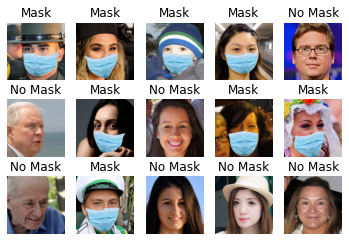

In [23]:
train_data = torch.utils.data.DataLoader(train_set, batch_size=len(train_set), num_workers=1, shuffle=True)
display_data(train_data)

In [24]:
classifier = svm.SVC(gamma=0.001)

In [29]:
images, labels = [], []
for _images, _labels in train_data:
    images = _images
    labels = _labels

In [35]:
classifier.fit(images.view(-1, 240*240*3), labels)

SVC(gamma=0.001)

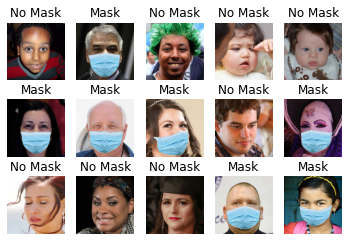

In [36]:
test_data = torch.utils.data.DataLoader(test_set, batch_size=784, num_workers=1, shuffle=True)
display_data(test_data)

In [40]:
test_images, test_labels = [], []
for _images, _labels in test_data:
    test_images = _images
    test_labels = _labels

In [ ]:
predicted = classifier.predict(test_images.view(-1, 240*240*3))

In [39]:
print("Accuracy:", metrics.accuracy_score(test_labels, predicted))

Accuracy: 1.0
